In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


file_path = "datasets/air_quality_health_impact_data.csv"
df = pd.read_csv(file_path )

df.head()


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [2]:
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), i

In [3]:
df = df.drop(columns=['HealthImpactClass'])
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
          RecordID          AQI         PM10        PM2_5          NO2  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean   2906.000000   248.438476   148.654997   100.223714   102.293445   
std    1677.635538   144.777638    85.698500    58.096612    57.713175   
min       1.000000     0.005817     0.015848     0.031549     0.009625   
25%    1453.500000   122.951293    75.374954    49.435171    53.538538   
50%    2906.000000   249.127841   147.634997   100.506337   102.987736   
75%    4358.500000   373.630668   222.436759   151.340260   151.658516   
max    5811.000000   499.858837   299.901962   199.984965   199.980195   

               SO2           O3  Temperature     Humidity    WindSpeed  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean     49.456838   149.312431    14.975500    54.776853     9.989177   
std      28.530329    86.534240    14.483067    26.020786     5.776950   
min       0.01102

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
dtype: int64


In [5]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


Visual Representations :

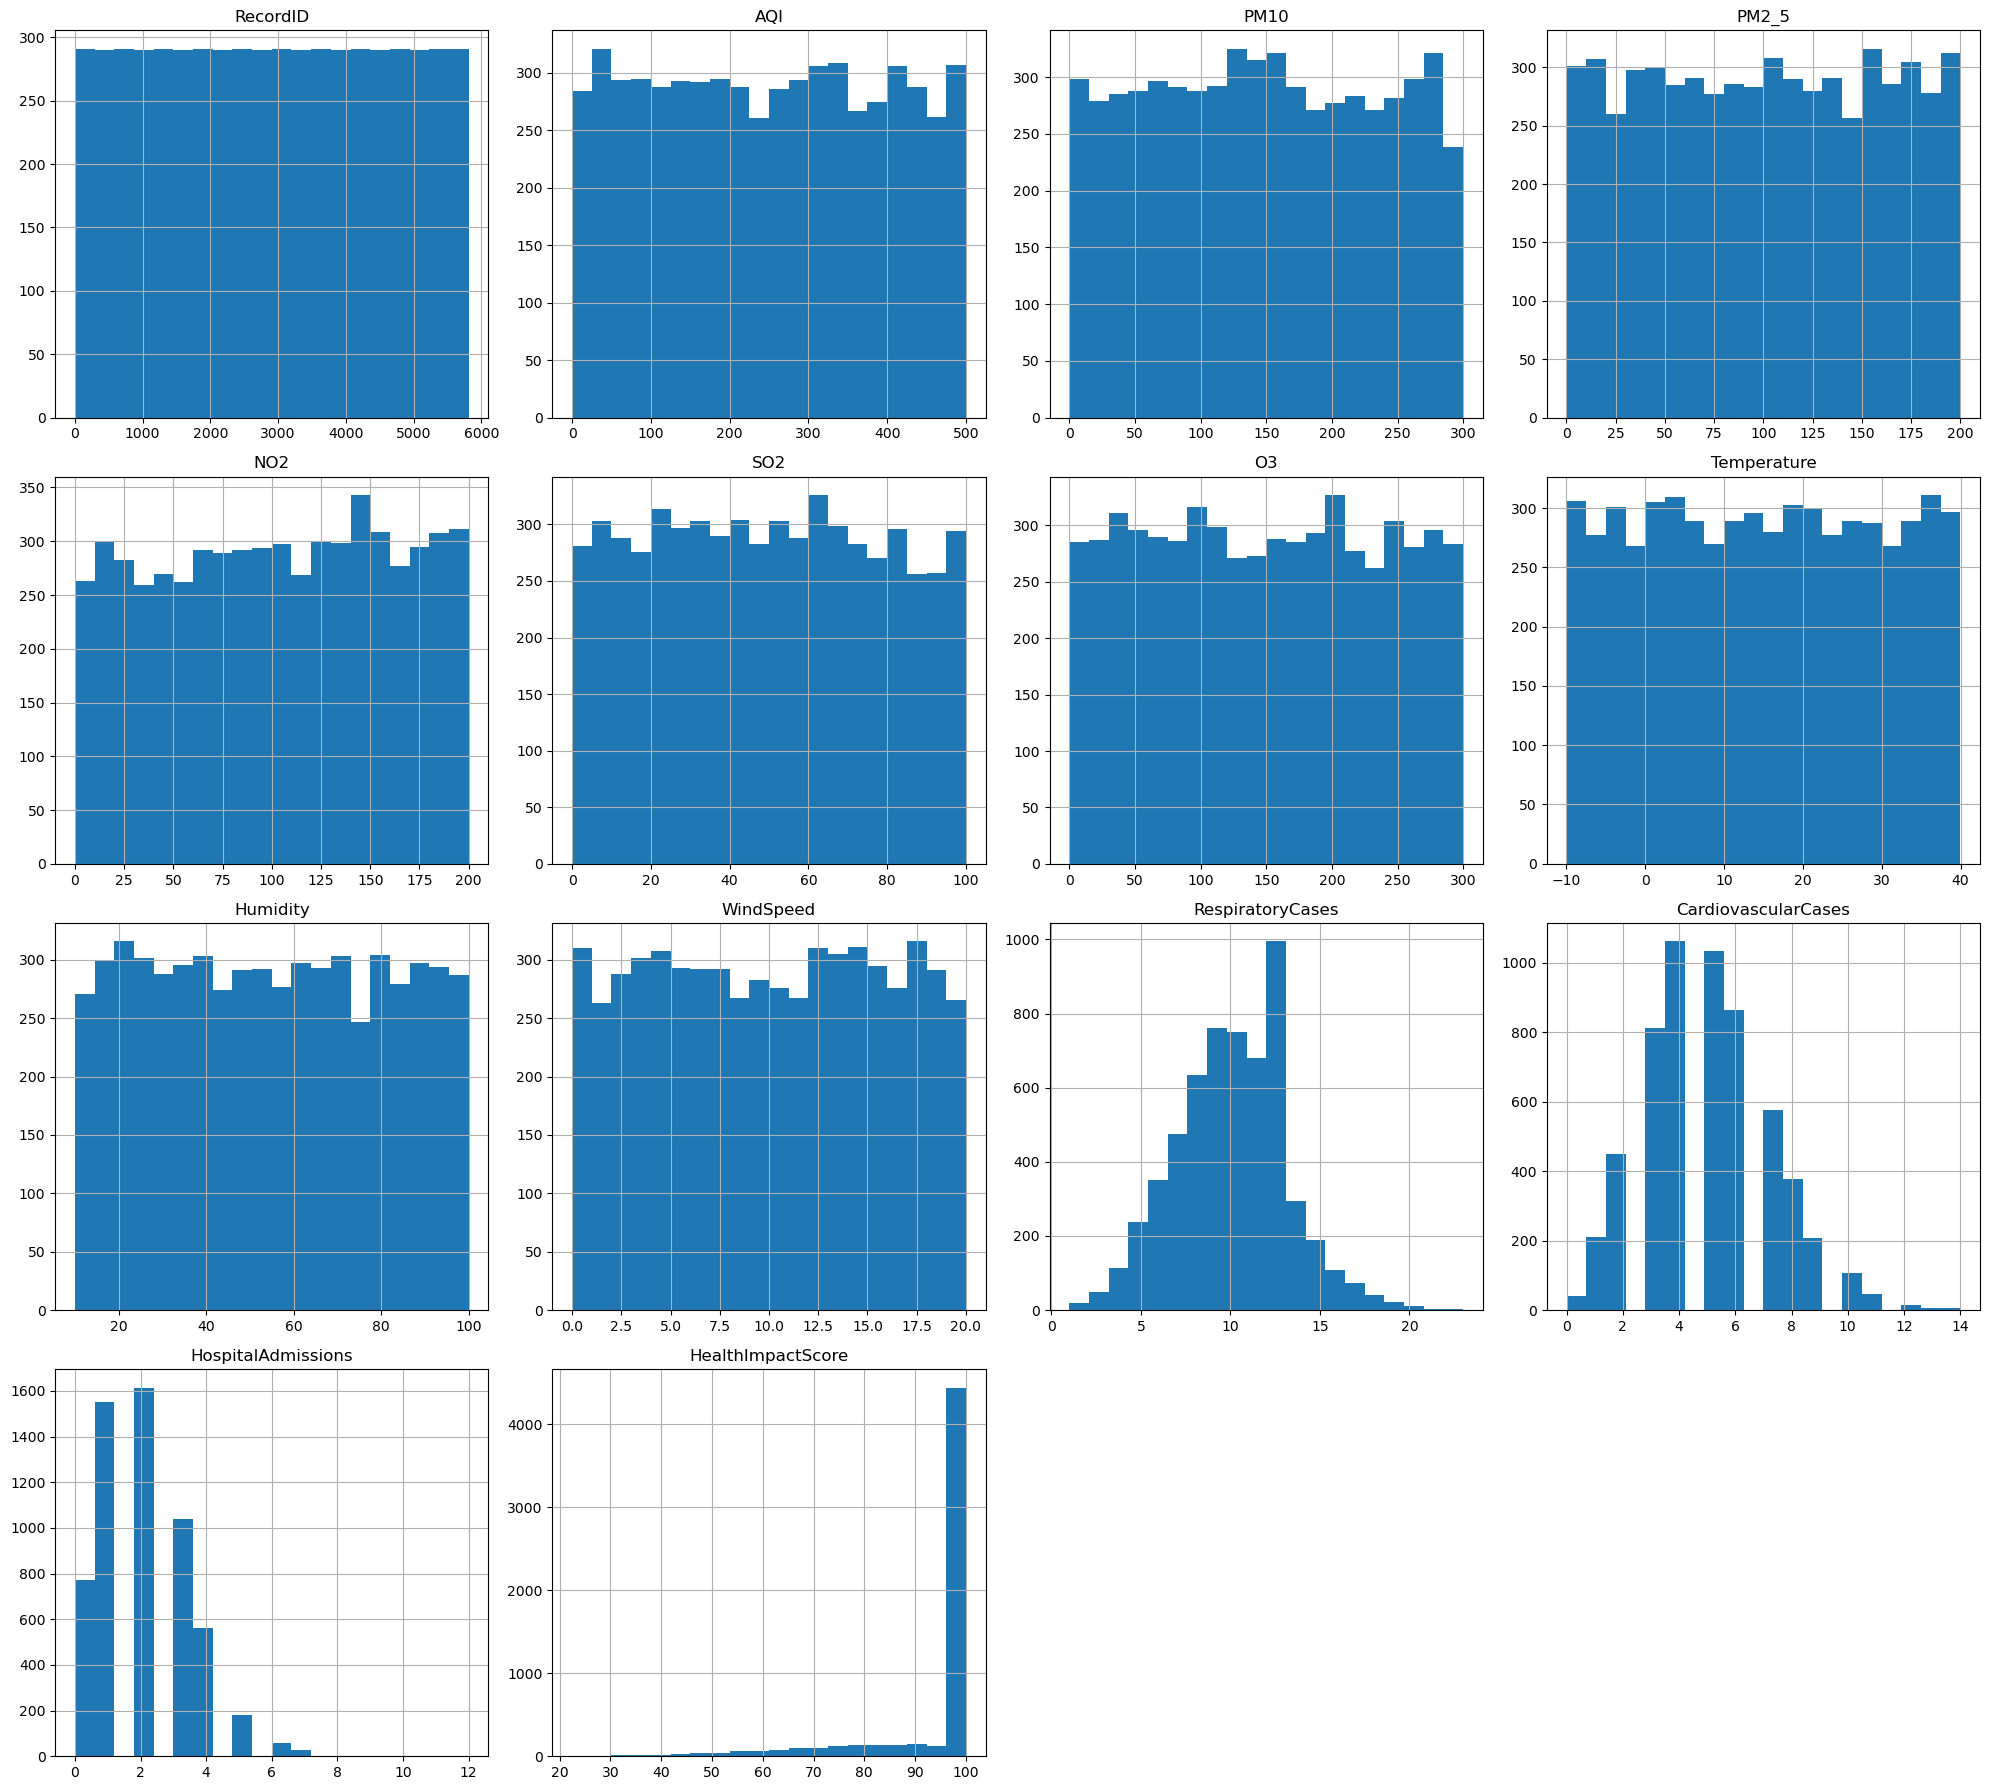

In [6]:
# Histogram of numerical features
df.hist(bins=20, figsize=(20, 18))
plt.tight_layout()
plt.show()

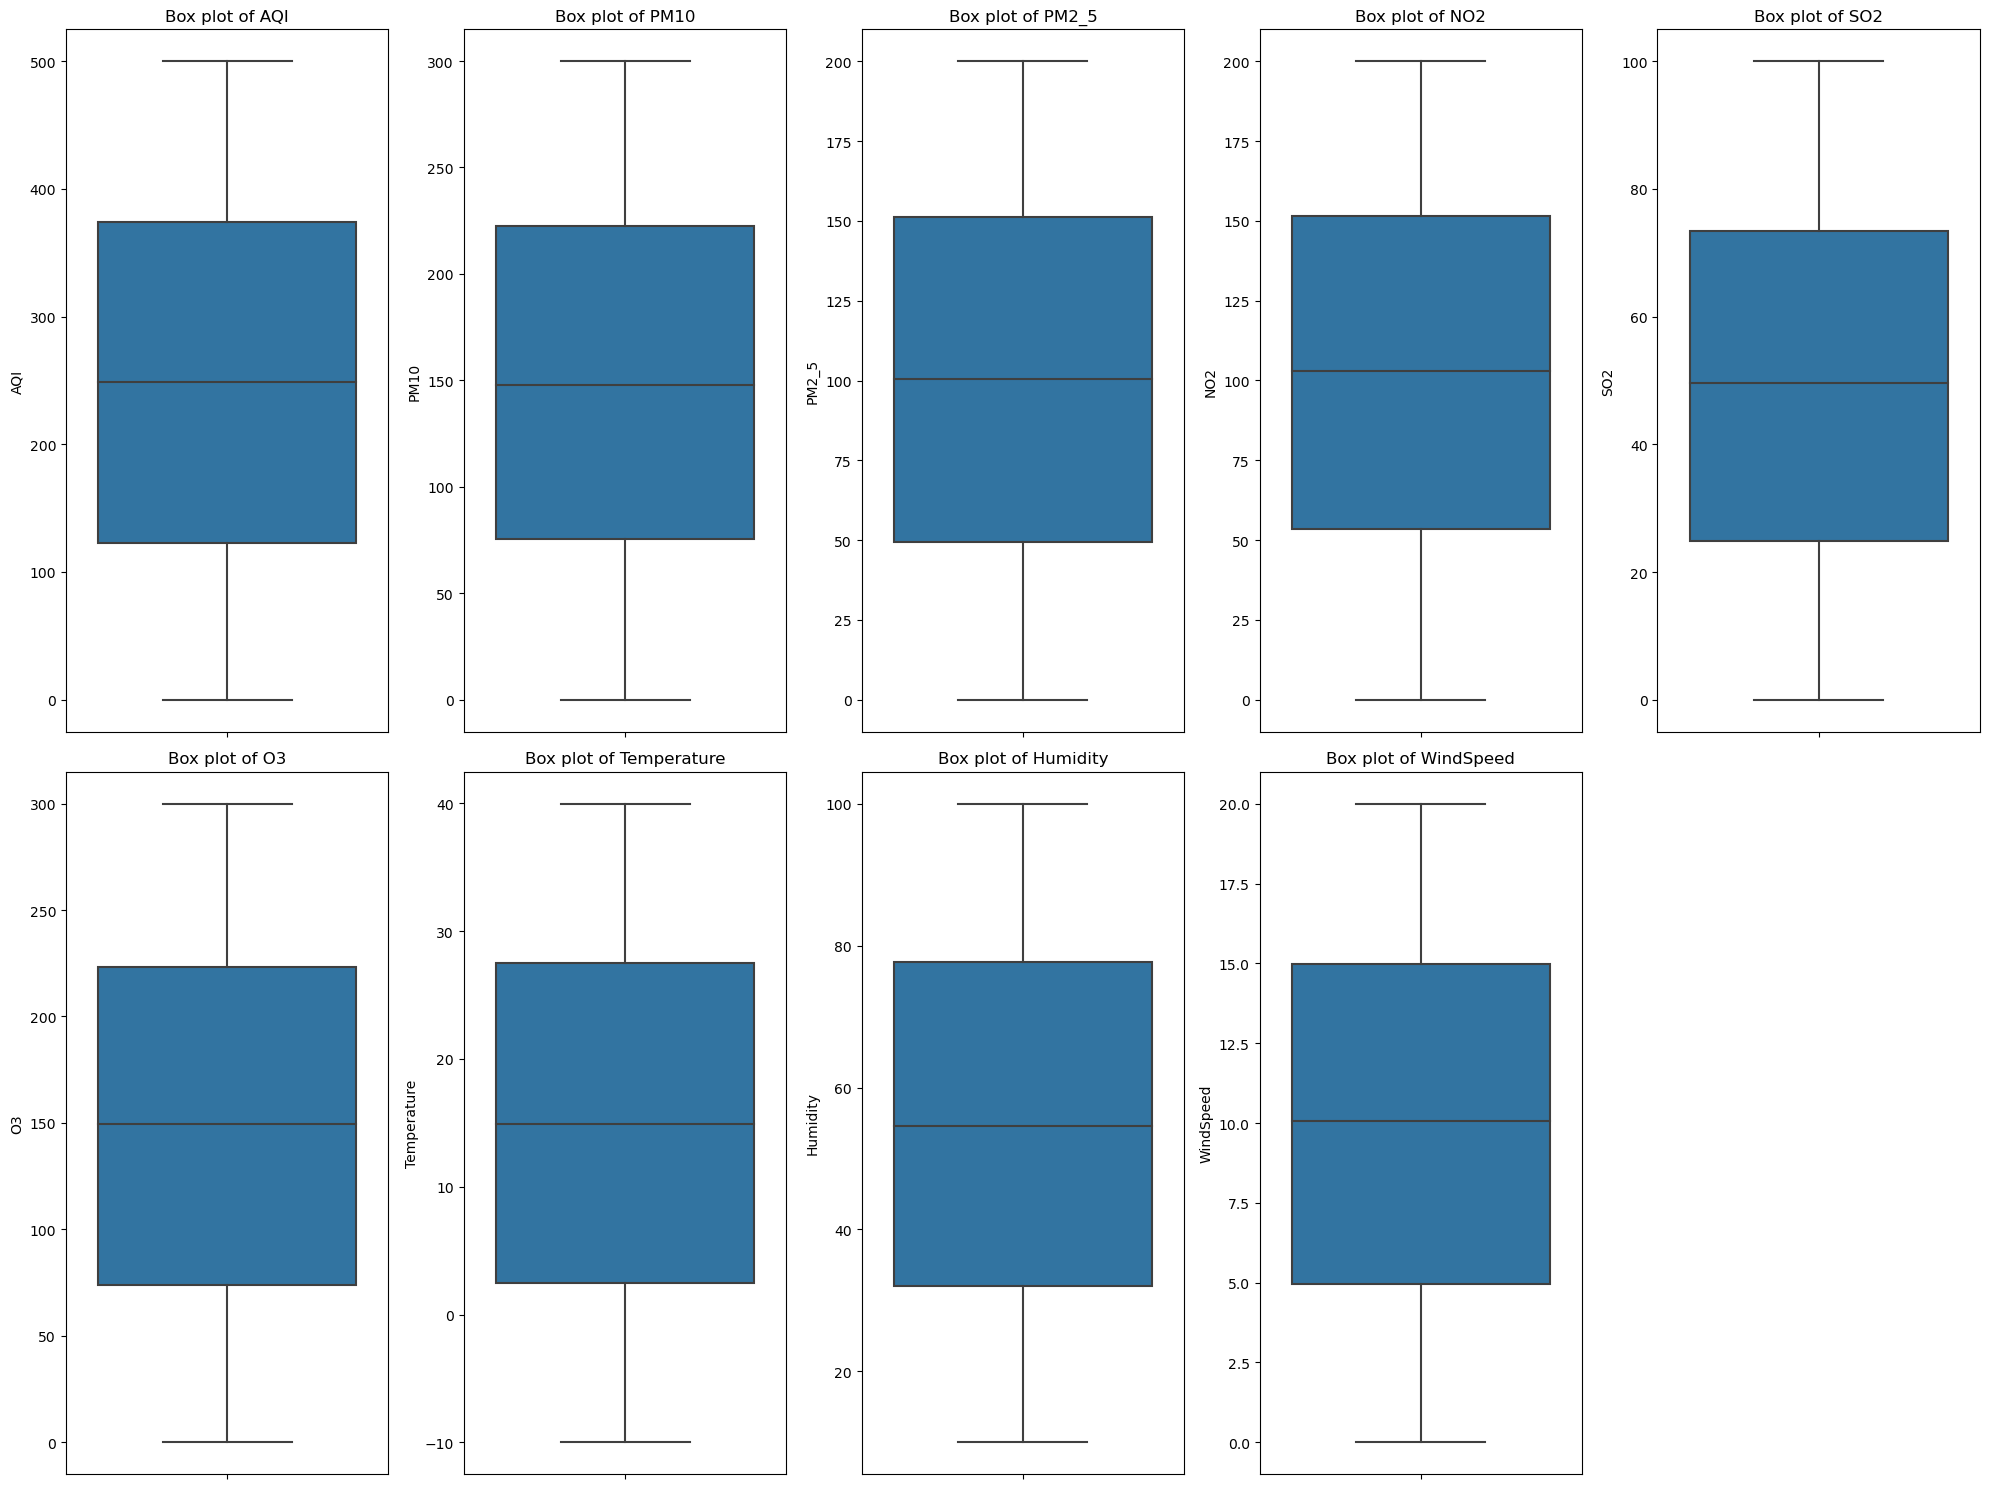

In [7]:
# Box plot for numerical features
numerical_columns = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [8]:
# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Function to detect outliers for all columns in the dataframe
def detect_outliers_all(df):
    outliers_summary = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:  # For numerical columns only
        outliers = detect_outliers(df, col)
        outliers_summary[col] = outliers.shape[0]  # Store the number of outliers for each column
    return outliers_summary

# Example: Assuming your DataFrame is named 'df'
outliers_all = detect_outliers_all(df)

# Print the outliers for each column
for col, count in outliers_all.items():
    print(f"Number of outliers in '{col}': {count}")


Number of outliers in 'RecordID': 0
Number of outliers in 'AQI': 0
Number of outliers in 'PM10': 0
Number of outliers in 'PM2_5': 0
Number of outliers in 'NO2': 0
Number of outliers in 'SO2': 0
Number of outliers in 'O3': 0
Number of outliers in 'Temperature': 0
Number of outliers in 'Humidity': 0
Number of outliers in 'WindSpeed': 0
Number of outliers in 'RespiratoryCases': 42
Number of outliers in 'CardiovascularCases': 74
Number of outliers in 'HospitalAdmissions': 31
Number of outliers in 'HealthImpactScore': 1352


Handling the outliers with median or log reduction, worsens the model. Hence keep them as it is.


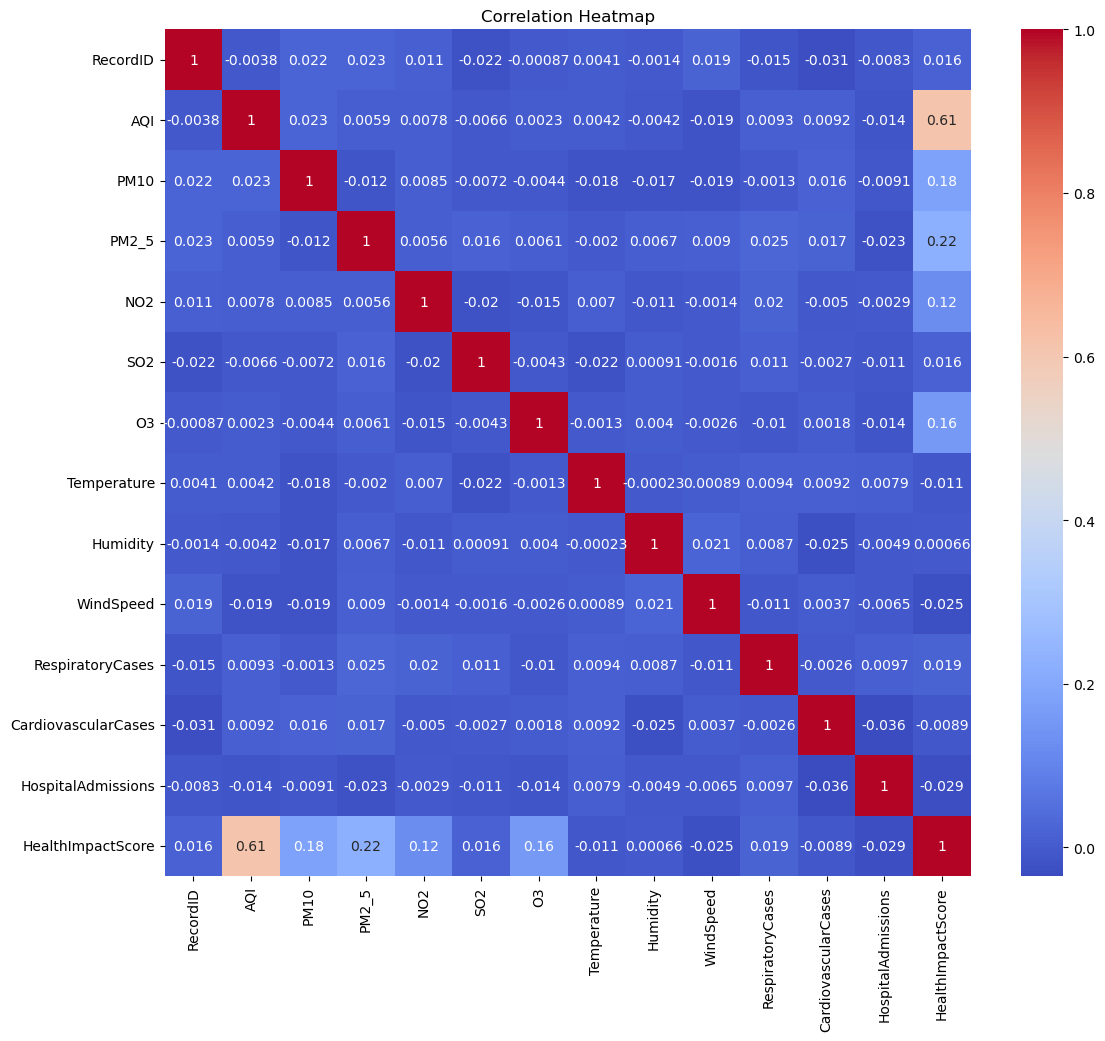

In [9]:
# Correlation heatmap
plt.figure(figsize=(13, 11))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


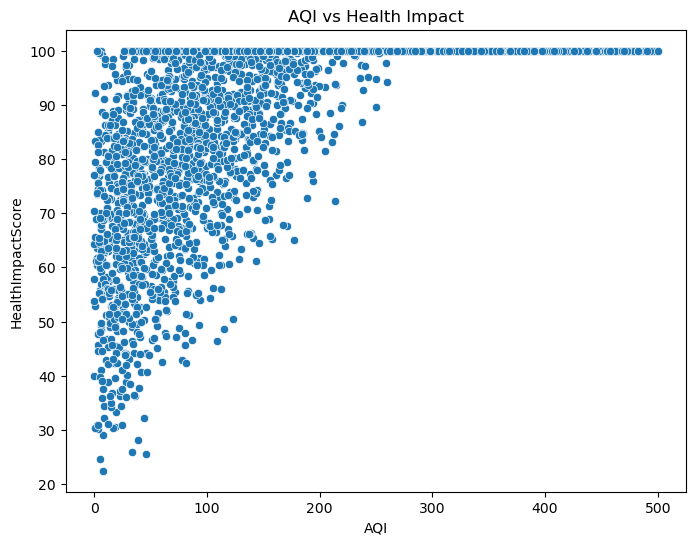

In [10]:
# Scatter plot: AQI vs Health Impact
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AQI', y='HealthImpactScore', data=df)  
plt.title('AQI vs Health Impact')
plt.show()

In [11]:
X = df.drop(columns=['HealthImpactScore'])  
y = df['HealthImpactScore']  # Set target

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X (all features are scaled)
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())  # Check the scaled values


   RecordID       AQI      PM10     PM2_5       NO2       SO2        O3  \
0 -1.731753 -0.422535  1.717775 -1.500822 -1.657549  0.585544 -1.094322   
1 -1.731157  1.567495  1.138971 -1.553395 -1.489825  1.438687  0.234717   
2 -1.730561  0.812063 -0.749340 -1.327427 -0.103549 -1.107022 -1.621528   
3 -1.729964  0.351540 -1.489470 -1.479565 -0.364923 -0.039723 -0.648948   
4 -1.729368 -1.177280 -1.536534  0.893208  0.328238  1.451539  1.068833   

   Temperature  Humidity  WindSpeed  RespiratoryCases  CardiovascularCases  \
0    -0.678448  1.139475  -0.666745         -0.950534             0.004969   
1    -0.927516 -0.304607  -0.946559          0.008250            -1.348455   
2    -0.953334 -1.420905   0.202236          0.967033            -0.897314   
3     0.479897  1.717872   0.919824         -0.630939             1.358392   
4    -0.397601 -1.148028   0.786911         -0.311345            -2.250738   

   HospitalAdmissions  
0           -0.715701  
1           -1.430664  
2       

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4648, 13)
Testing set size: (1163, 13)


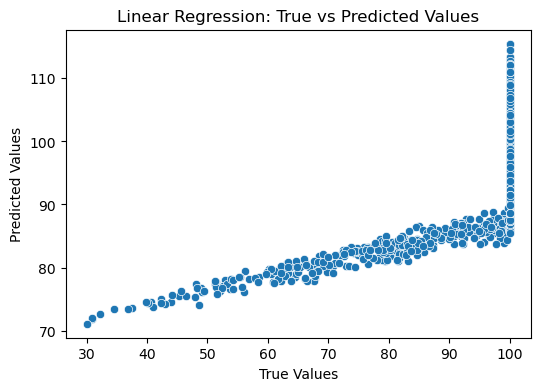

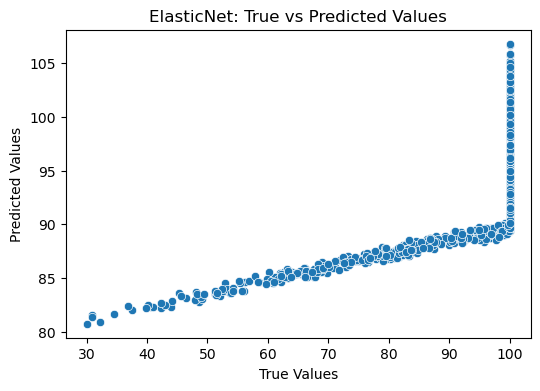

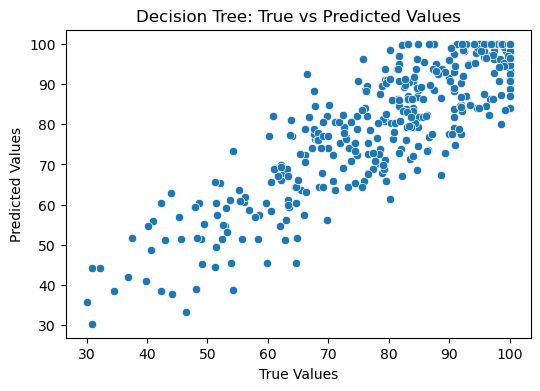

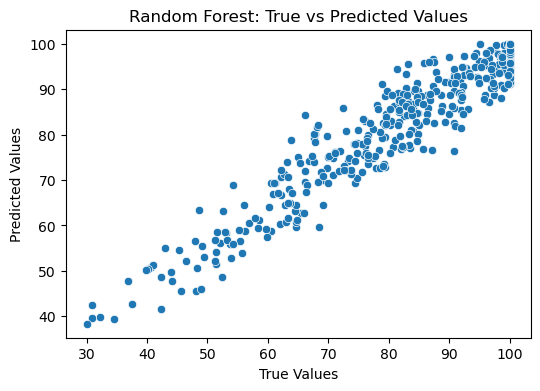

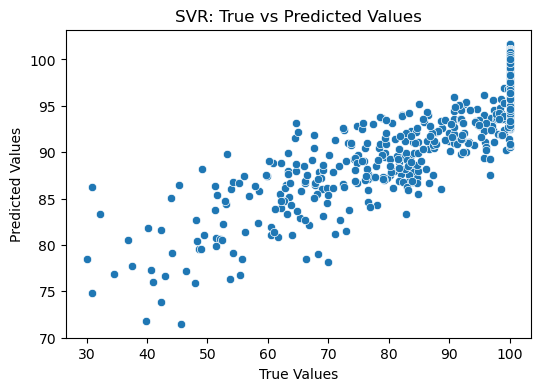

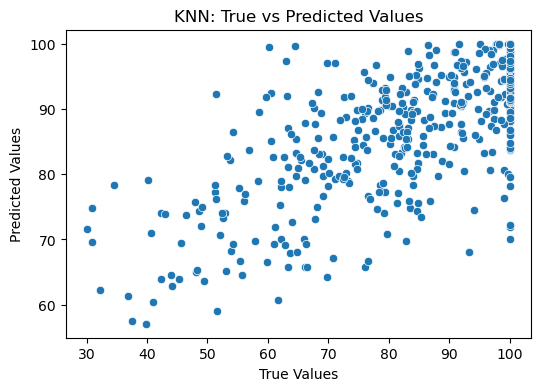

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2598
[LightGBM] [Info] Number of data points in the train set: 4648, number of used features: 13
[LightGBM] [Info] Start training from score 93.922841


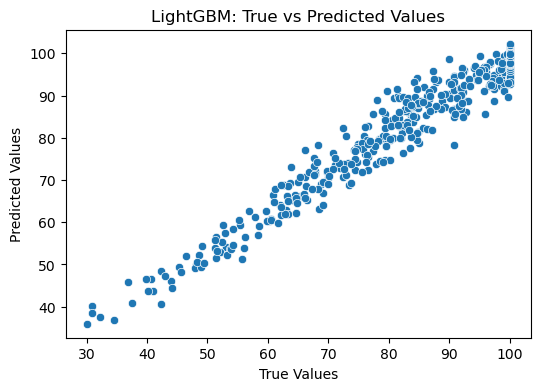

                        RMSE        R²
Linear Regression   9.626274  0.505432
ElasticNet         10.475769  0.414292
Decision Tree       4.834265  0.875270
Random Forest       3.213934  0.944871
SVR                 9.500201  0.518302
KNN                 8.338664  0.628890
LightGBM            2.374184  0.969916


In [14]:
!pip install lightgbm
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'LightGBM': lgb.LGBMRegressor(objective='regression', 
                                 boosting_type='gbdt', 
                                 learning_rate=0.05, 
                                 num_leaves=31, 
                                 max_depth=-1, 
                                 n_estimators=100, 
                                 random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2, y_pred

# Store results
results = {}

# Evaluate all models
for model_name, model in models.items():
    rmse, r2, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        'RMSE': rmse,
        'R²': r2
    }
    
    # Visualize predictions (optional)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: True vs Predicted Values')
    plt.show()

# Display all results
results_df = pd.DataFrame(results).T
print(results_df)


Therefore LGBM is the best model for this dataset.

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate LightGBM (Final Model)
lgbm_model = lgb.LGBMRegressor(objective='regression', 
                               boosting_type='gbdt', 
                               learning_rate=0.05, 
                               num_leaves=31, 
                               max_depth=-1, 
                               n_estimators=100, 
                               random_state=42)

# Fit the model on training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred_lgbm)
r2 = r2_score(y_test, y_pred_lgbm)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2598
[LightGBM] [Info] Number of data points in the train set: 4648, number of used features: 13
[LightGBM] [Info] Start training from score 93.922841
Mean Squared Error (MSE): 5.636748869629746
Root Mean Squared Error (RMSE): 2.3741838323158015
Mean Absolute Error (MAE): 1.1774394394522
R-squared (R²): 0.9699158381956269
